In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('bank-additional.csv',delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.shape

(4119, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [7]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [10]:
c_cols = df.select_dtypes(include='object').columns
print(c_cols)

n_cols = df.select_dtypes(exclude='object').columns
print(n_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [11]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


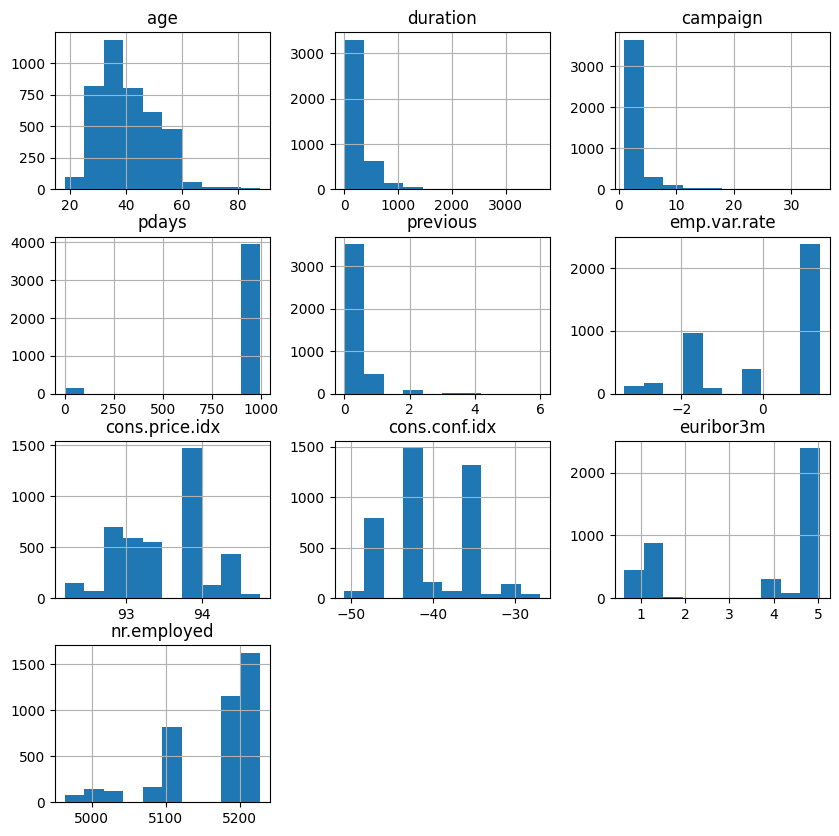

In [12]:
df.hist(figsize=(10,10))
plt.show()

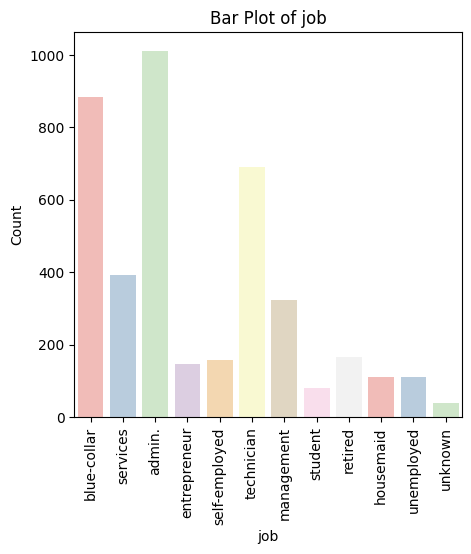

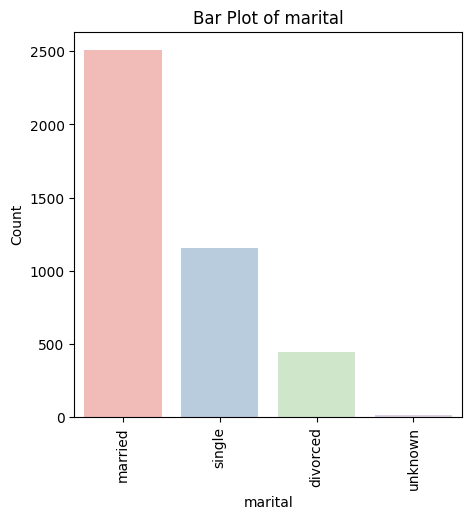

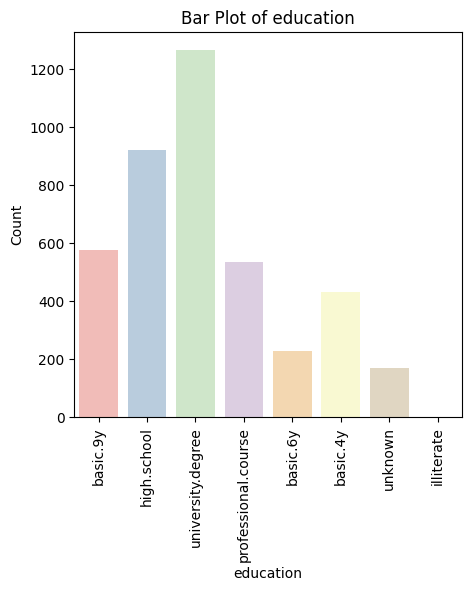

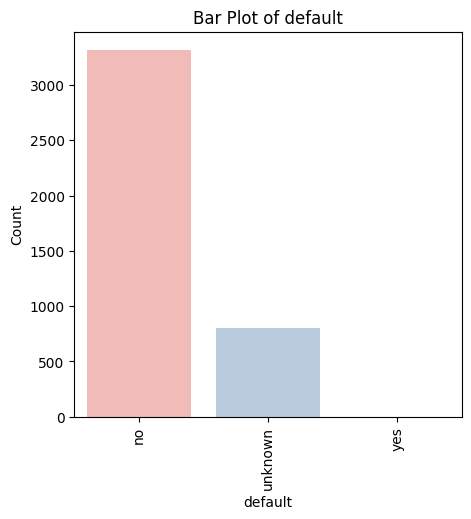

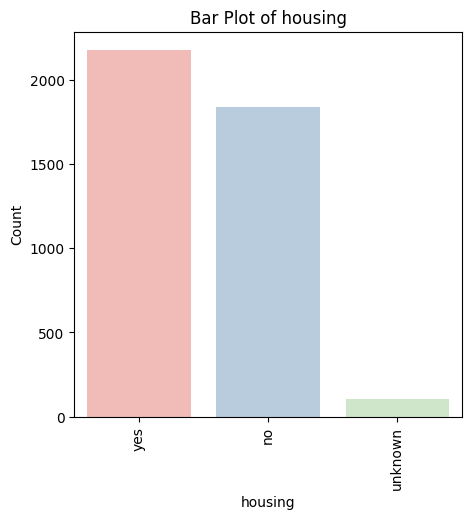

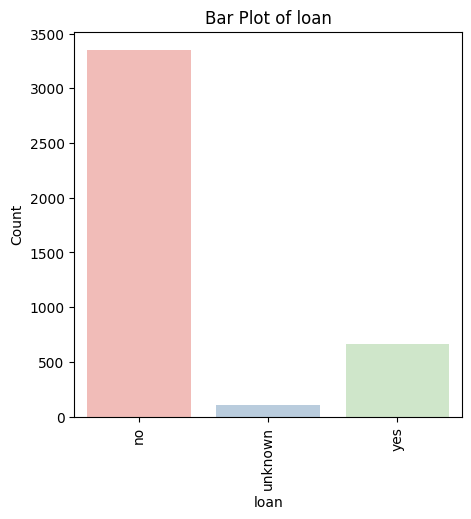

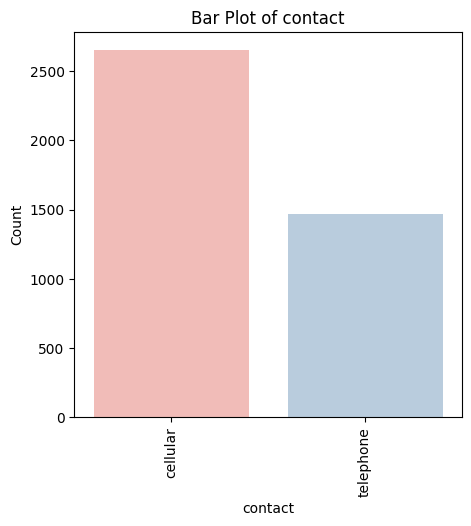

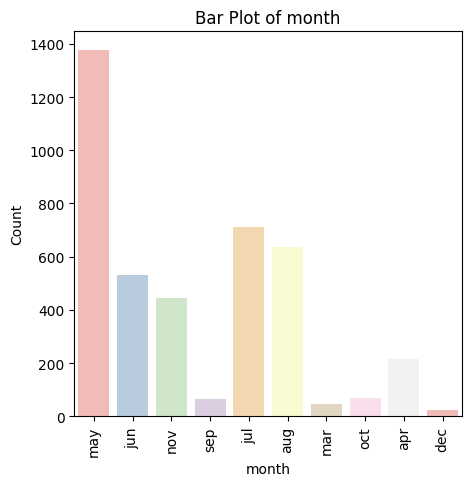

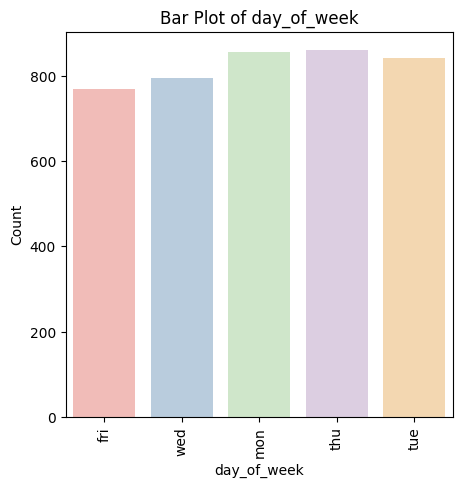

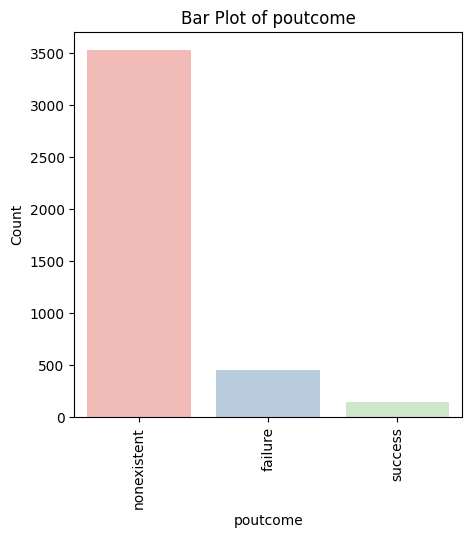

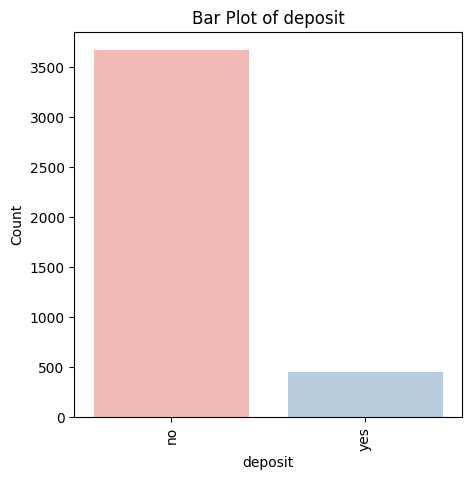

In [13]:
for feature in c_cols:
    plt.figure(figsize=(5,5))  # Adjust the size 
    sns.countplot(x=feature, data=df, palette='Pastel1')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

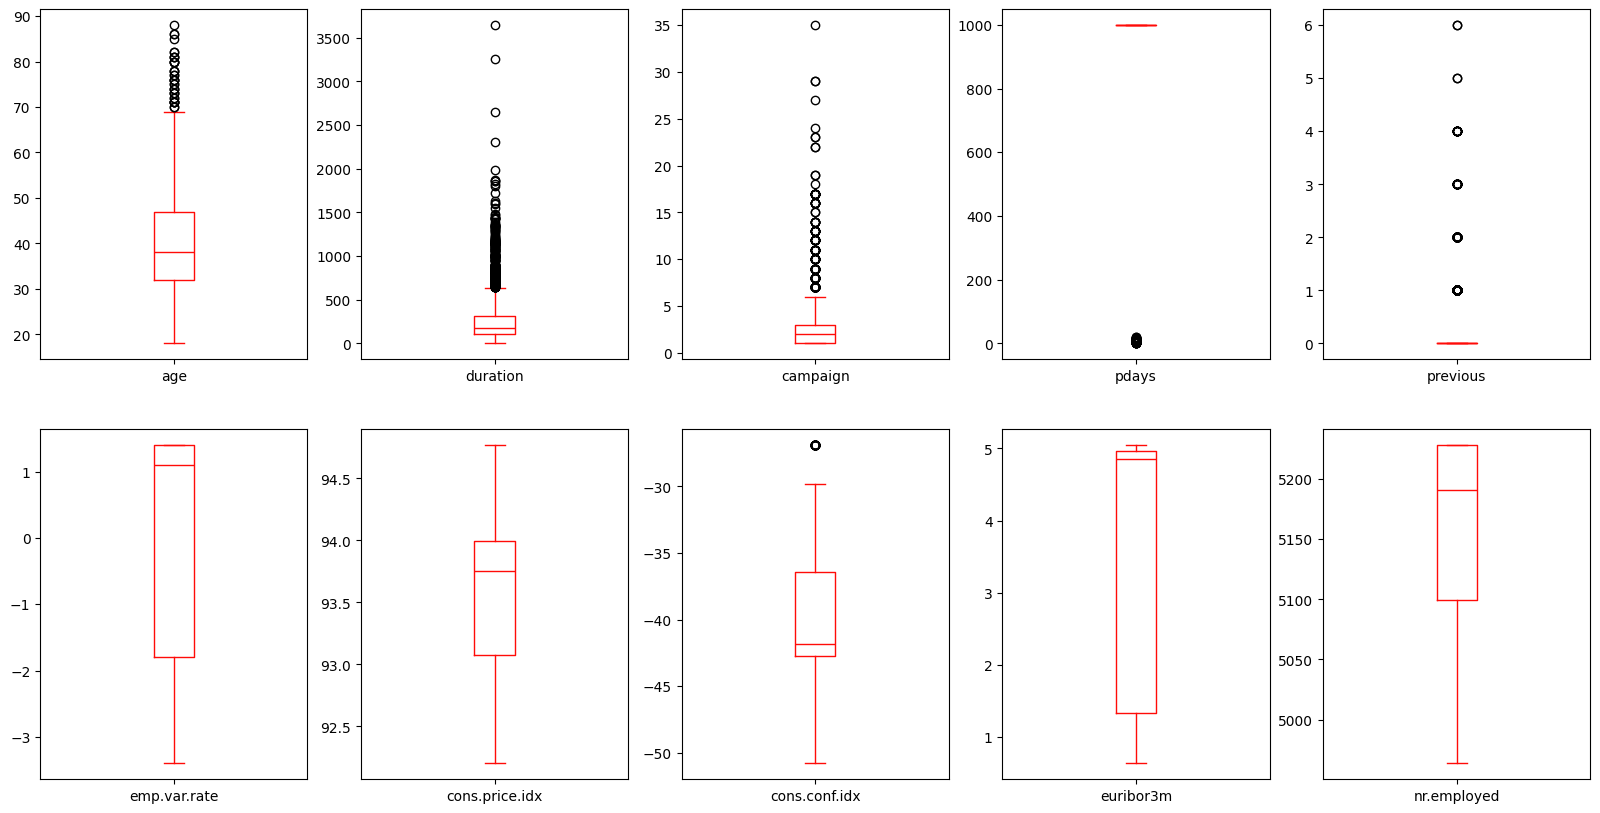

In [14]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color="#FF0B08")
plt.show()

In [15]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

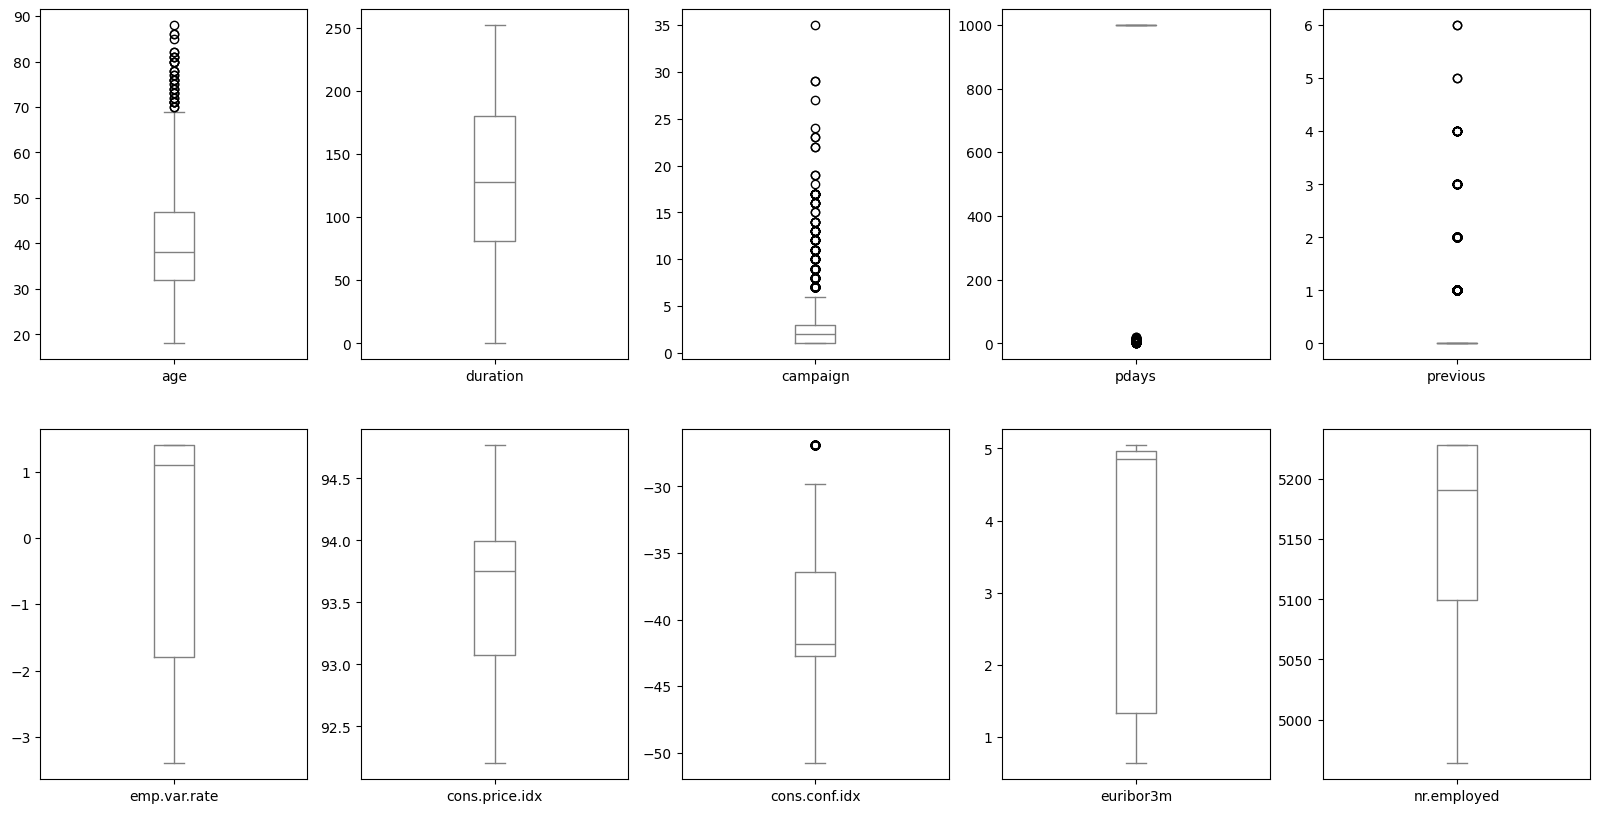

In [16]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808080')
plt.show()

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.014048 -0.014169 -0.043425  0.050931   
duration        0.014048  1.000000 -0.218111 -0.093694  0.094206   
campaign       -0.014169 -0.218111  1.000000  0.058742 -0.091490   
pdays          -0.043425 -0.093694  0.058742  1.000000 -0.587941   
previous        0.050931  0.094206 -0.091490 -0.587941  1.000000   
emp.var.rate   -0.019192 -0.063870  0.176079  0.270684 -0.415238   
cons.price.idx -0.000482 -0.013338  0.145021  0.058472 -0.164922   
cons.conf.idx   0.098135  0.045889  0.007882 -0.092090 -0.051420   
euribor3m      -0.015033 -0.067815  0.159435  0.301478 -0.458851   
nr.employed    -0.041936 -0.097339  0.161037  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019192       -0.000482       0.098135  -0.015033   
duration           -0.063870       -0.013338       0.045889  -0.067815   
campaign            0.176079 

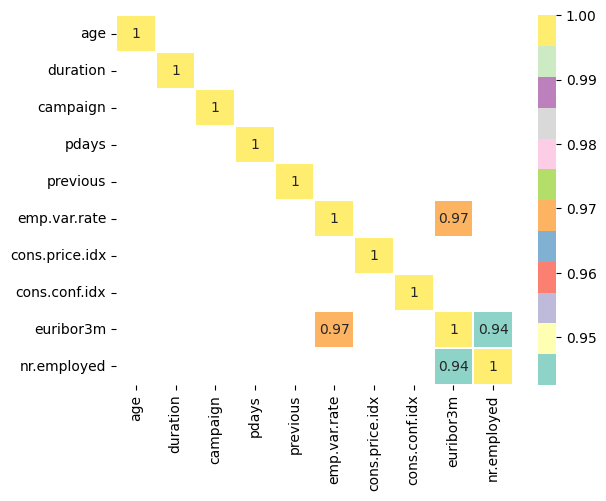

In [17]:
# Exclude non-numeric columns
numeric_df = df.drop(columns=c_cols)

# Compute the correlation matrix
corr = numeric_df.corr()

# Print the correlation matrix
print(corr)

# Filter correlations with absolute value >= 0.90
corr = corr[abs(corr) >= 0.90]

sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [18]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,12,1,1,2,0,2,0,0,6,0,...,1,20,0,1,3,8,4,156,6,0
1,21,7,2,3,0,0,0,1,6,0,...,3,20,0,1,8,18,16,207,8,0
2,7,7,1,3,0,2,0,1,4,4,...,0,20,0,1,9,23,8,225,10,0
3,20,7,1,2,0,1,1,1,4,0,...,2,20,0,1,9,23,8,222,10,0
4,29,0,1,6,0,2,0,0,7,1,...,0,20,0,1,7,11,7,201,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,...,0,20,0,1,9,17,6,221,10,0
4115,21,0,1,3,0,2,0,1,3,0,...,0,20,0,1,9,17,6,222,10,0
4116,9,8,2,3,0,0,0,0,6,1,...,1,20,1,0,3,8,4,160,6,0
4117,40,0,1,3,0,0,0,0,1,0,...,0,20,0,1,9,13,17,229,10,0


In [21]:
df_encoded['deposit'].count()

4119

In [22]:
df_encoded['deposit'].value_counts()

deposit
0    3668
1     451
Name: count, dtype: int64

In [23]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 20)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 20)
(1030, 20)
(3089,)
(1030,)


In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [27]:
mscore(dt)

Training Score 0.9219812236969893
Testing Score 0.9087378640776699


In [28]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 1 0 0]


In [29]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.9087378640776699
Confusion Matrix
 [[902  28]
 [ 66  34]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       930
           1       0.55      0.34      0.42       100

    accuracy                           0.91      1030
   macro avg       0.74      0.65      0.69      1030
weighted avg       0.89      0.91      0.90      1030



In [30]:
from sklearn.tree import plot_tree
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
['no', 'yes']


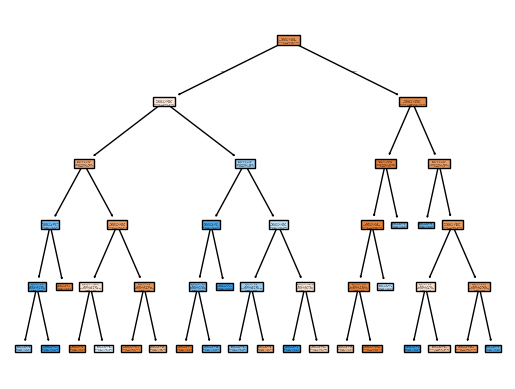

In [31]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [32]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [33]:
mscore(dt1)

Training Score 0.915182907089673
Testing Score 0.9106796116504854


In [34]:
ypred_dt1 = dt1.predict(x_test)

In [35]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.9106796116504854
Confusion Matrix
 [[896  34]
 [ 58  42]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       930
           1       0.55      0.42      0.48       100

    accuracy                           0.91      1030
   macro avg       0.75      0.69      0.71      1030
weighted avg       0.90      0.91      0.91      1030



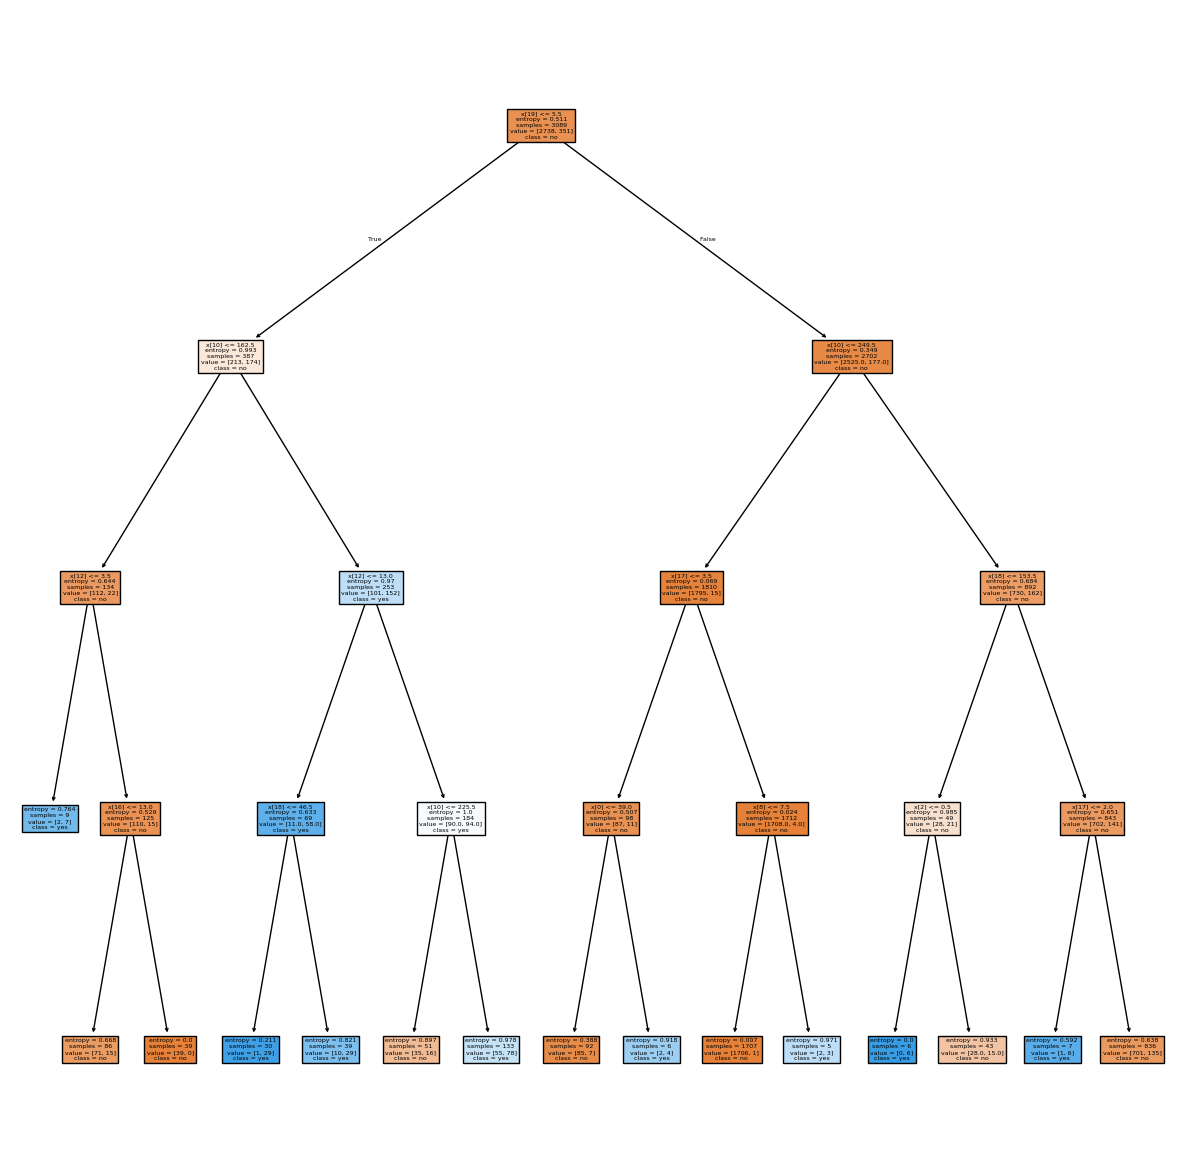

In [36]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()

<Axes: xlabel='job', ylabel='count'>

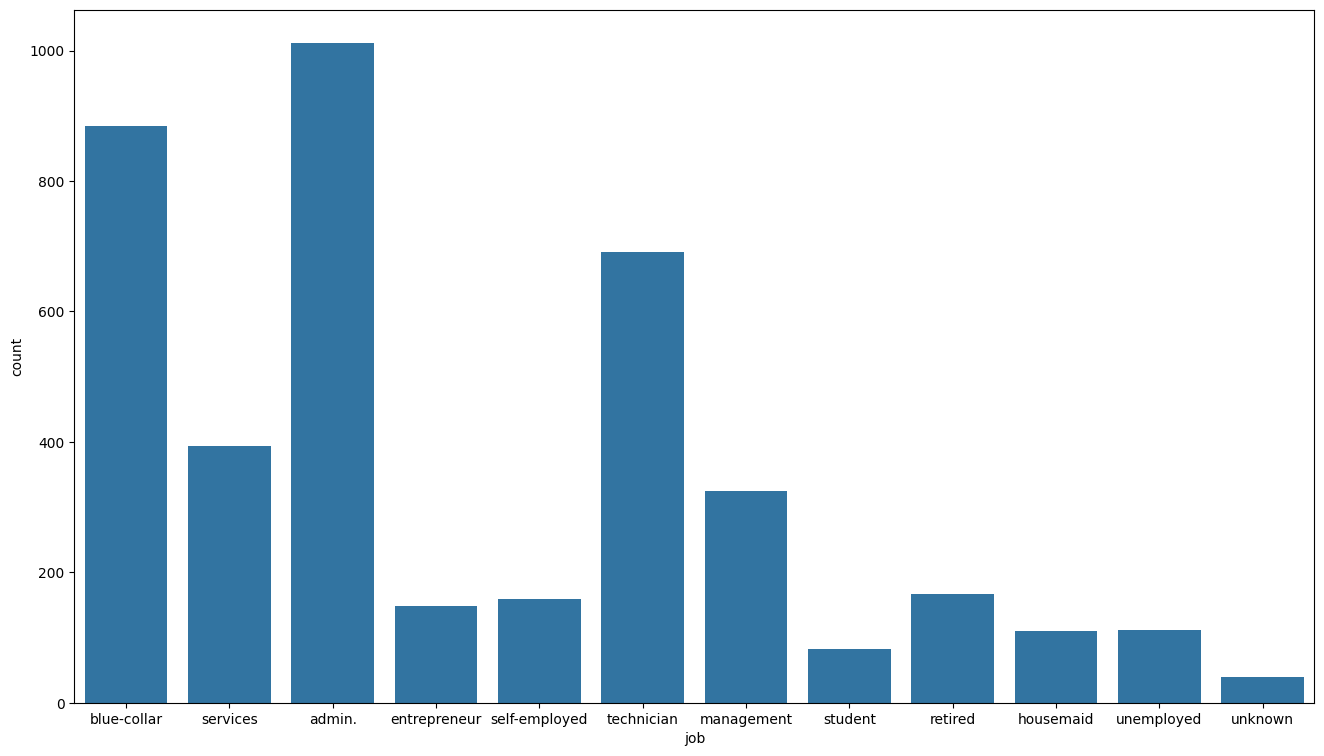

In [37]:
plt.figure(figsize = (16,9))
sns.countplot(x = "job",data = df)

<Axes: xlabel='marital', ylabel='count'>

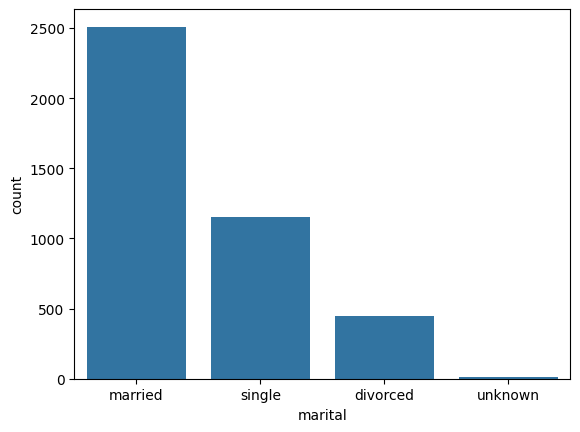

In [38]:
sns.countplot(x = "marital",data = df)

<Figure size 200x600 with 0 Axes>

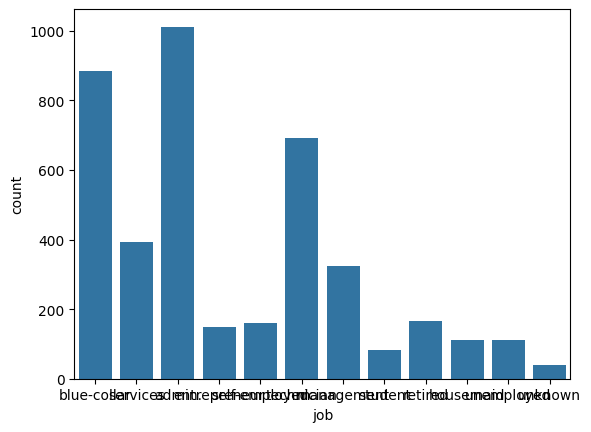

<Figure size 200x600 with 0 Axes>

In [44]:
sns.countplot(x = "job",data = df)
plt.figure(figsize=(2, 6))


<Axes: xlabel='loan', ylabel='count'>

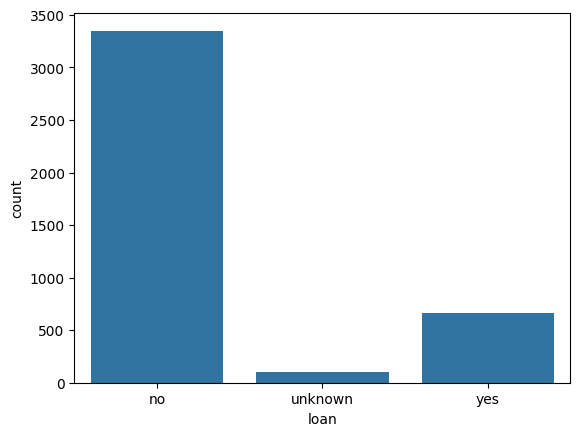

In [45]:
sns.countplot(x = "loan",data = df)

<Axes: xlabel='education', ylabel='count'>

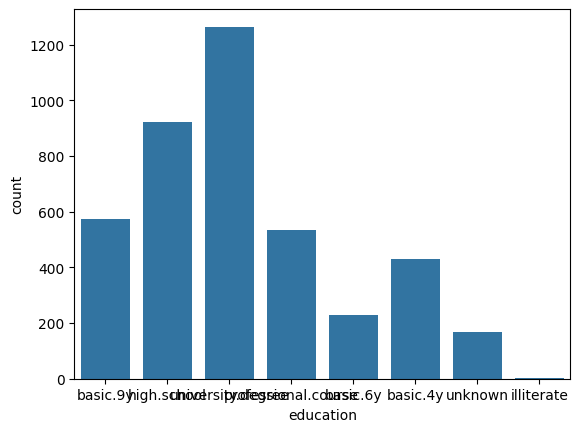

In [46]:
sns.countplot(x = "education",data = df)

<Axes: xlabel='default', ylabel='count'>

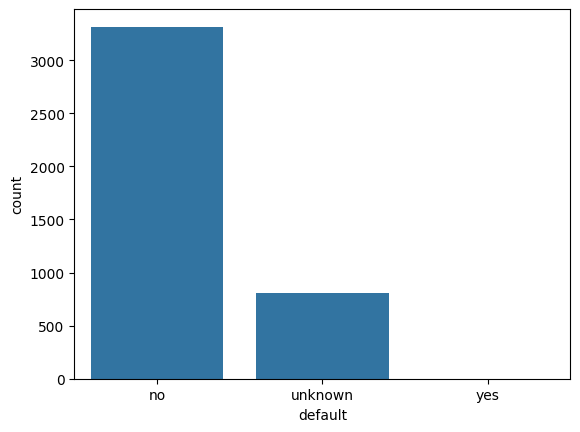

In [47]:
sns.countplot(x = "default",data = df)

<Figure size 1200x800 with 0 Axes>

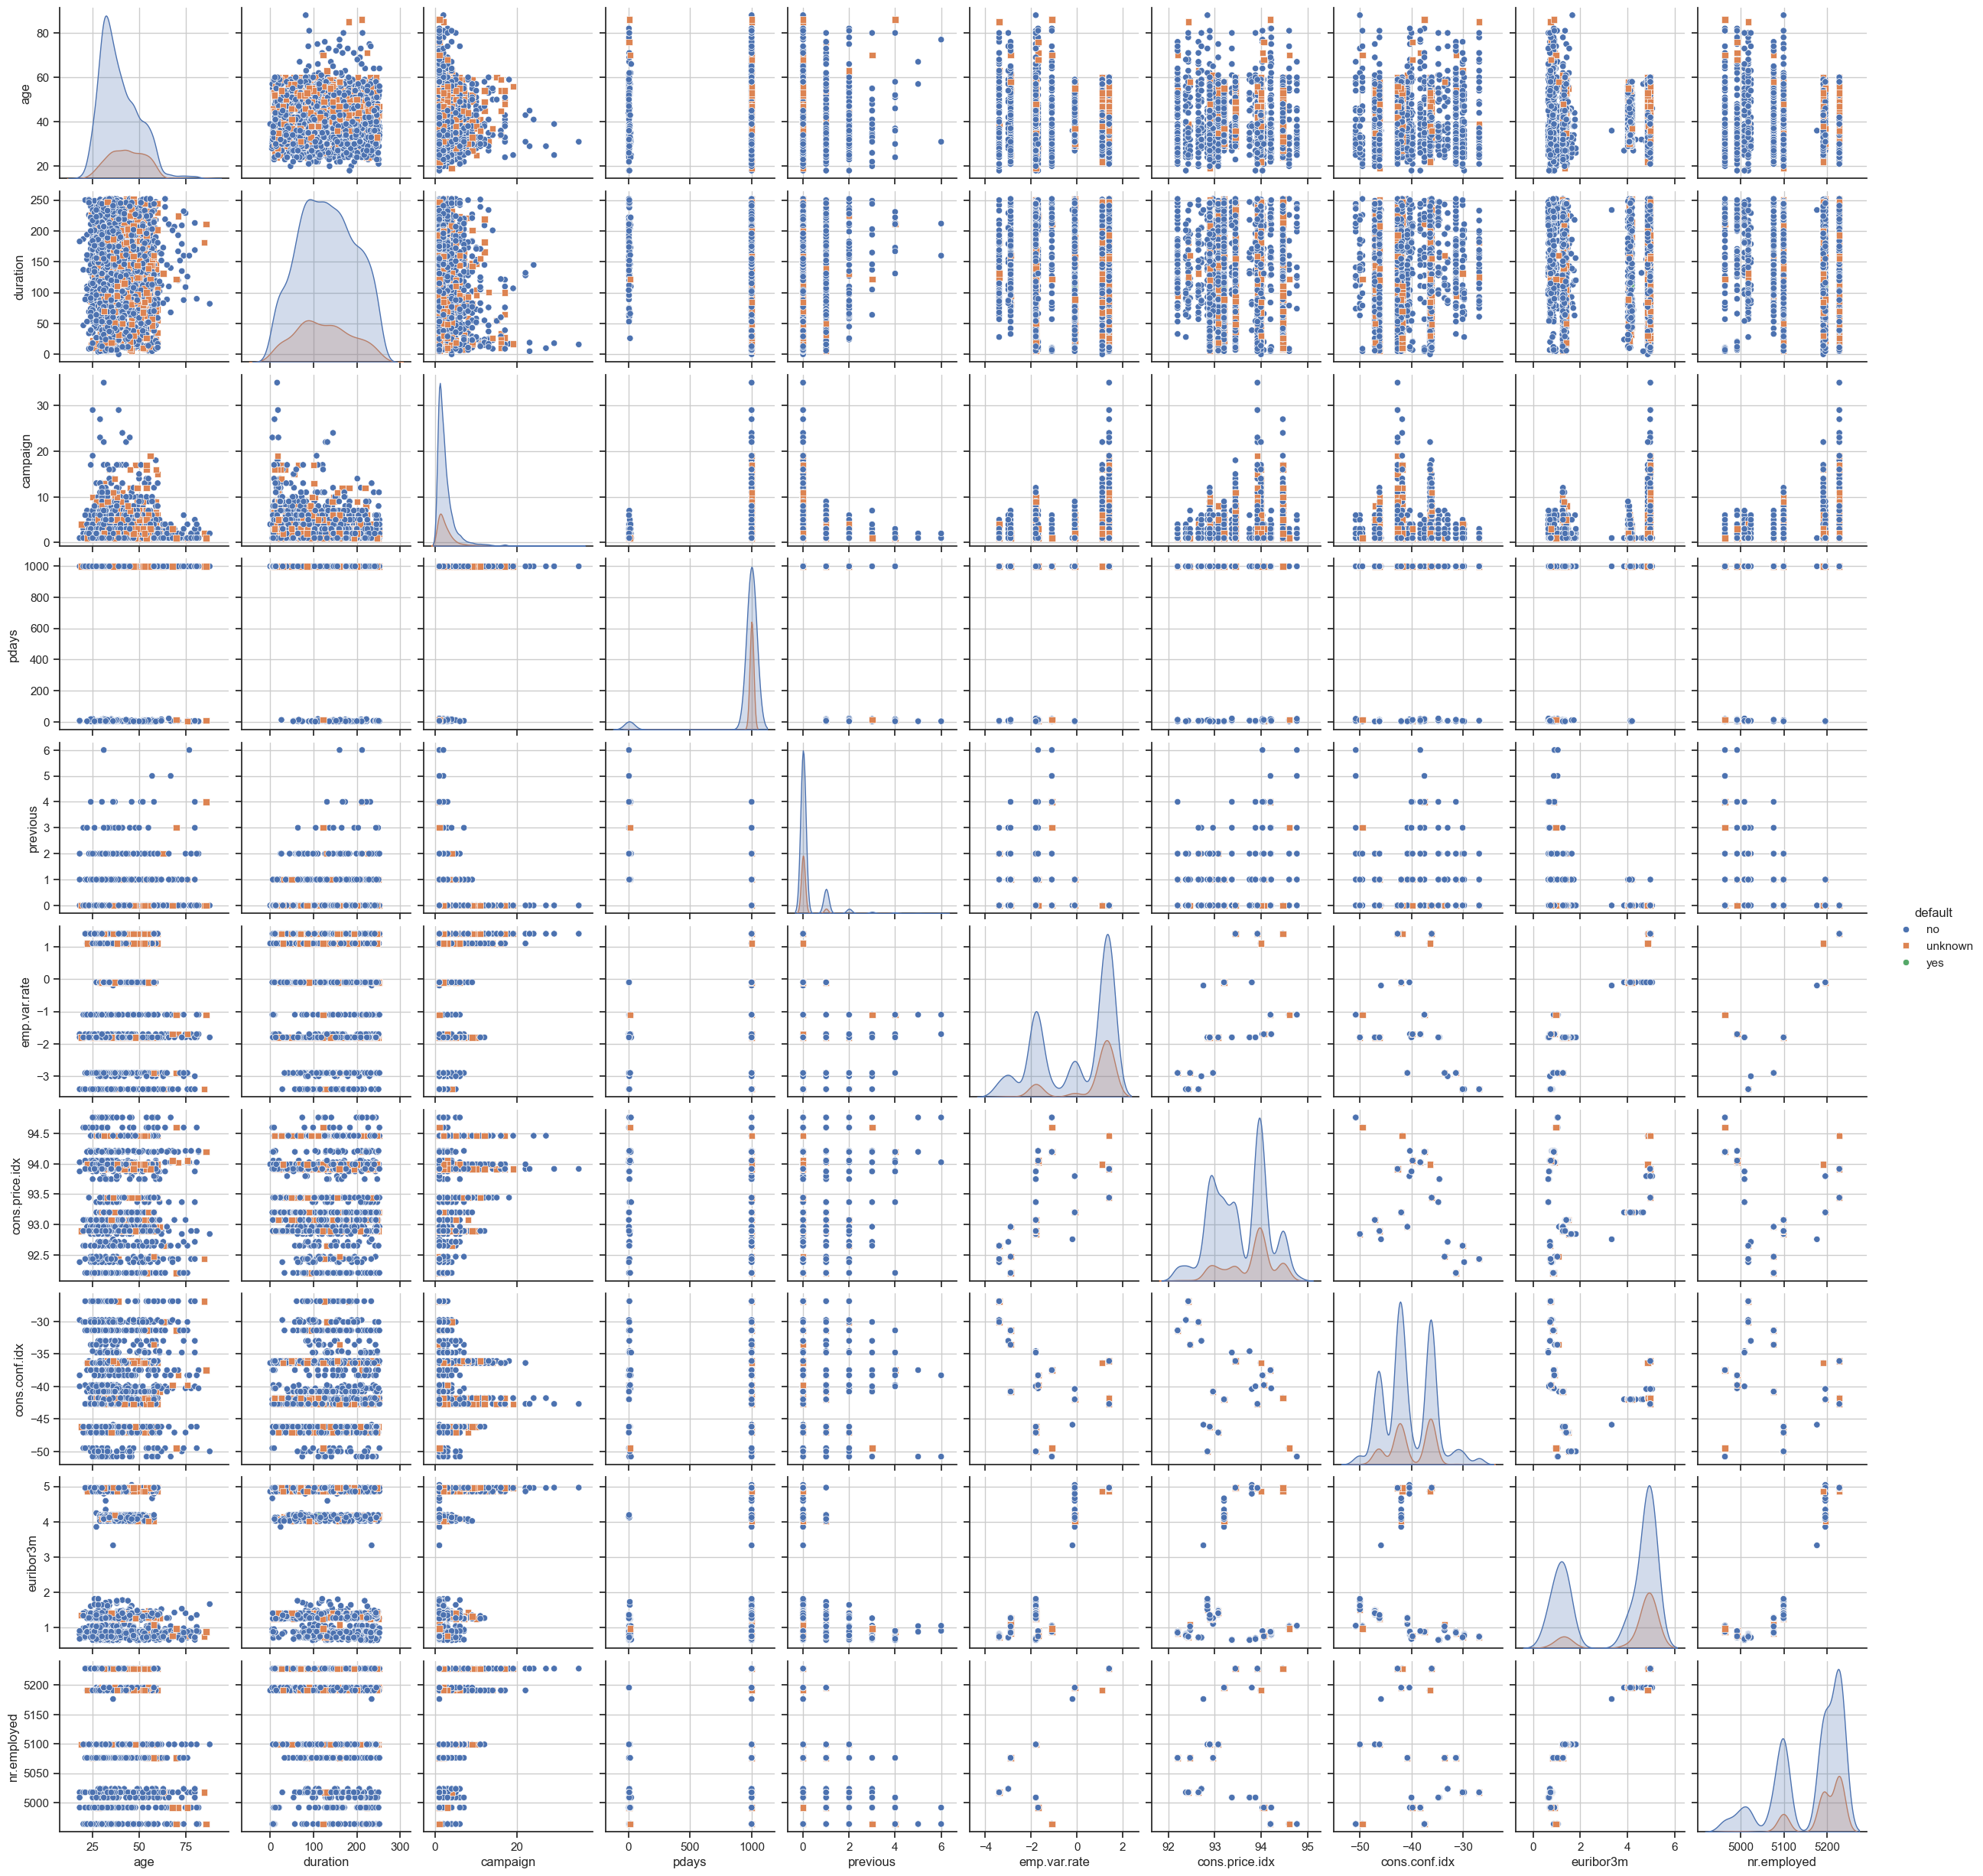

In [50]:
# Set the aspect ratio to make plots wider
sns.set(style="ticks", rc={"axes.grid": True})
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Create the pair plot
sns.pairplot(data=df, hue="default", markers=["o", "s"])  # Adjust markers for better visibility

# Show the plot
plt.show()

In [51]:
my_df=df.select_dtypes(exclude=[object])
my_df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.014048,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.014048,1.000000,-0.218111,-0.093694,0.094206,-0.063870,-0.013338,0.045889,-0.067815,-0.097339
campaign,-0.014169,-0.218111,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.093694,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.094206,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.063870,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,-0.013338,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,0.045889,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.067815,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.097339,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


<Axes: >

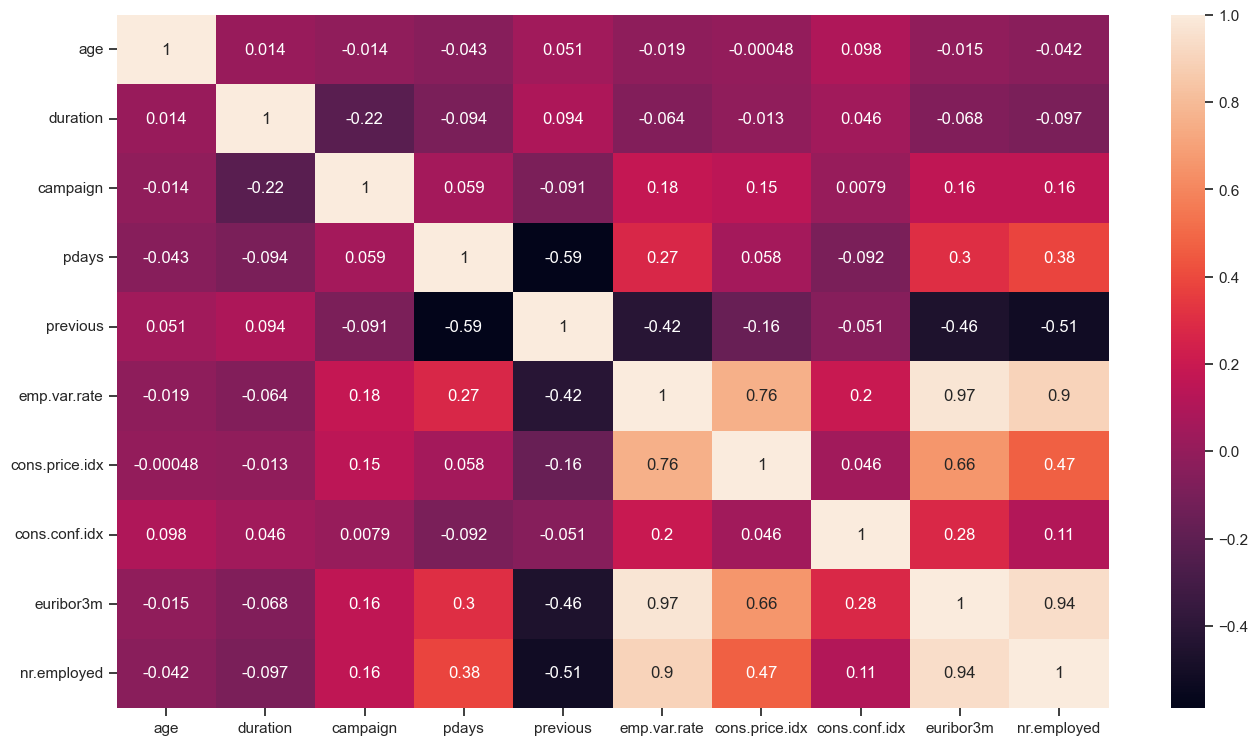

In [52]:
plt.figure(figsize = (16,9))
sns.heatmap(my_df.corr(),annot = True)

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
df["job"] = le.fit_transform(df["job"])
df["marital"] = le.fit_transform(df["marital"])
df["education"] = le.fit_transform(df["education"])
df["default"] = le.fit_transform(df["default"])
df["loan"] = le.fit_transform(df["loan"])
df["contact"] = le.fit_transform(df["contact"])
df["poutcome"] = le.fit_transform(df["poutcome"])
df["housing"] = le.fit_transform(df["housing"])
df["month"] = le.fit_transform(df["month"])

In [55]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,1,1,2,0,2,0,0,6,fri,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,7,2,3,0,0,0,1,6,fri,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,no
2,25,7,1,3,0,2,0,1,4,wed,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,no
3,38,7,1,2,0,1,1,1,4,fri,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,no
4,47,0,1,6,0,2,0,0,7,mon,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,no


In [57]:
df.drop(['pdays','previous','poutcome'],axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,1,1,2,0,2,0,0,6,fri,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,7,2,3,0,0,0,1,6,fri,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,no
2,25,7,1,3,0,2,0,1,4,wed,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,no
3,38,7,1,2,0,1,1,1,4,fri,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,no
4,47,0,1,6,0,2,0,0,7,mon,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,no
